In [1]:
import pandas as pd
#Get data from CSV
data17_21_speed = pd.read_csv(r"C:\Users\eamon\Downloads\sprint_speed_2017-2021.csv")
data22_speed = pd.read_csv(r"C:\Users\eamon\Downloads\sprint_speed_2022.csv")
data22_ba = pd.read_csv(r"C:\Users\eamon\Downloads\2022_groundballba.csv",encoding = "ISO-8859-1")
data17_21_ba = pd.read_csv(r"C:\Users\eamon\Downloads\groundballba(2017-2021).csv",encoding = "ISO-8859-1")
data17_21 = pd.read_csv(r"C:\Users\eamon\Downloads\data2017-2021.csv",encoding = "ISO-8859-1")
data22 = pd.read_csv(r"C:\Users\eamon\Downloads\data2022.csv",encoding = "ISO-8859-1")
data22_slg = pd.read_csv(r"C:\Users\eamon\Downloads\2022slg_data.csv",encoding = "ISO-8859-1")
data17_21_slg = pd.read_csv(r"C:\Users\eamon\Downloads\2017-2021slg_data.csv",encoding = "ISO-8859-1")

In [2]:
data17_21 = data17_21[["Pitches","Player"]]
data22 = data22[["Pitches","Player"]]

data17_21_speed['full_name'] = data17_21_speed[['last_name',' first_name']].apply(lambda x: ','.join(x), axis=1)

data22_speed['full_name'] = data22_speed[['last_name',' first_name']].apply(lambda x: ','.join(x), axis=1)


#Make sure to change the variable name for pitches for hits and ground balls
data17_21_slg = data17_21_slg[["Player", "Pitches", "SLG", "xSLG", "SLG - xSLG"]]
data22_slg = data22_slg[["Player", "Pitches", "SLG", "xSLG", "SLG - xSLG"]]
data22_ba = data22_ba[["Player","Pitches", "xBA", "BA - xBA"]]
data22_ba = data22_ba[["Player","Pitches", "xBA", "BA - xBA"]]
data17_21_ba = data17_21_ba[["Player","Pitches", "xBA", "BA - xBA"]]
data17_21_speed = data17_21_speed[["full_name", "hp_to_1b", "sprint_speed"]]


In [3]:
data22_speed['full_name'] = data22_speed[['last_name',' first_name']].apply(lambda x: ','.join(x), axis=1)
data22_speed.head()
data22_speed = data22_speed[["full_name", "hp_to_1b", "sprint_speed"]]
data22_ba.head()

,Player,Pitches,xBA,BA - xBA
0,"Rosario, Amed",278,0.241,0.047
1,"Guerrero Jr., Vladimir",275,0.219,0.025
2,"Yelich, Christian",246,0.273,-0.004
3,"Bichette, Bo",245,0.261,0.025
4,"Nimmo, Brandon",243,0.255,0.062


In [4]:
data22_speed.head()

data22_ba.rename(columns={"Pitches":"Ground_Balls"},inplace=True)
data22_slg.rename(columns={"Pitches":"Non-HR_Hits"},inplace=True)

data22_ba.head()
data22_slg.head()

,Player,Non-HR_Hits,SLG,xSLG,SLG - xSLG
0,"Freeman, Freddie",178,1.287,0.791,0.496
1,"Turner, Trea",173,1.272,0.708,0.564
2,"Rosario, Amed",169,1.260,0.666,0.594
3,"Abreu, JosÃ©",168,1.238,0.773,0.465
4,"Arraez, Luis",165,1.200,0.763,0.437


In [5]:
#Get all 2022 data into the same dataframe
data22_speed = data22_speed.rename(columns={'full_name':'Player'})
data22 = data22.merge(data22_speed, on='Player', how='left')
data22 = data22.merge(data22_slg, on='Player', how='left')
data22 = data22.merge(data22_ba, on='Player', how='left')
data22.rename(columns={"Pitches":"Total_Pitches"},inplace=True)

data22.head()

,Total_Pitches,Player,hp_to_1b,sprint_speed,Non-HR_Hits,SLG,xSLG,SLG - xSLG,Ground_Balls,xBA,BA - xBA
0,724,"Semien, Marcus",4.37,28.9,137.0,1.299,0.691,0.608,184.0,0.261,-0.006
1,707,"Turner, Trea",4.14,30.3,173.0,1.272,0.708,0.564,229.0,0.261,0.058
2,704,"Lindor, Francisco",4.44,27.5,144.0,1.243,0.718,0.525,219.0,0.252,0.031
3,700,"Guerrero Jr., Vladimir",4.56,26.6,143.0,1.245,0.686,0.559,275.0,0.219,0.025
4,697,"Bichette, Bo",4.50,27.5,165.0,1.273,0.752,0.521,245.0,0.261,0.025


In [6]:
#do the same for the data from 2017-2021
data17_21_ba.rename(columns={"Pitches":"Ground_Balls"},inplace=True)
data17_21_slg.rename(columns={"Pitches":"Non-HR_Hits"},inplace=True)

In [7]:
data17_21_speed = data17_21_speed.rename(columns={'full_name':'Player'})
data17_21 = data17_21.merge(data17_21_speed, on='Player', how='left')
data17_21 = data17_21.merge(data17_21_slg, on='Player', how='left')
data17_21 = data17_21.merge(data17_21_ba, on='Player', how='left')
data17_21.rename(columns={"Pitches":"Total_Pitches"},inplace=True)

data17_21.head()

,Total_Pitches,Player,hp_to_1b,sprint_speed,Non-HR_Hits,SLG,xSLG,SLG - xSLG,Ground_Balls,xBA,BA - xBA
0,3049,"Merrifield, Whit",4.26,28.8,755.0,1.283,0.778,0.505,917.0,0.254,0.026
1,2918,"Santana, Carlos",4.55,25.7,491.0,1.263,0.804,0.459,898.0,0.232,-0.025
2,2916,"Machado, Manny",4.59,26.3,580.0,1.259,0.787,0.472,889.0,0.251,0.021
3,2916,"Goldschmidt, Paul",4.51,26.6,588.0,1.281,0.887,0.394,747.0,0.264,0.031
4,2884,"Lindor, Francisco",4.27,28.0,565.0,1.313,0.792,0.521,912.0,0.251,-0.005


In [8]:
data17_21["Ground_Balls"].value_counts(ascending = True)

917.0    1
300.0    1
404.0    1
305.0    1
374.0    1
        ..
194.0    5
67.0     6
74.0     6
51.0     7
66.0     7
Name: Ground_Balls, Length: 414, dtype: int64

In [9]:
data17_21.count()
data17_21.nunique()


Total_Pitches     725
Player           1010
hp_to_1b           91
sprint_speed       67
Non-HR_Hits       330
SLG               214
xSLG              270
SLG - xSLG        268
Ground_Balls      414
xBA               139
BA - xBA          176
dtype: int64

In [10]:
data22.count()

Total_Pitches    547
Player           547
hp_to_1b         353
sprint_speed     353
Non-HR_Hits      293
SLG              293
xSLG             293
SLG - xSLG       293
Ground_Balls     335
xBA              335
BA - xBA         335
dtype: int64

In [11]:
#Take away rows that don't have full observations
#drop duplicate rows, if any
data17_21 = data17_21.drop_duplicates(subset=['Player'])
data22 = data22.drop_duplicates(subset=["Player"])
data22_clean = data22.dropna()
data17_21_clean = data17_21.dropna()


In [12]:
data22_clean.count()


Total_Pitches    260
Player           260
hp_to_1b         260
sprint_speed     260
Non-HR_Hits      260
SLG              260
xSLG             260
SLG - xSLG       260
Ground_Balls     260
xBA              260
BA - xBA         260
dtype: int64

In [13]:
data22_clean.head()

,Total_Pitches,Player,hp_to_1b,sprint_speed,Non-HR_Hits,SLG,xSLG,SLG - xSLG,Ground_Balls,xBA,BA - xBA
0,724,"Semien, Marcus",4.37,28.9,137.0,1.299,0.691,0.608,184.0,0.261,-0.006
1,707,"Turner, Trea",4.14,30.3,173.0,1.272,0.708,0.564,229.0,0.261,0.058
2,704,"Lindor, Francisco",4.44,27.5,144.0,1.243,0.718,0.525,219.0,0.252,0.031
3,700,"Guerrero Jr., Vladimir",4.56,26.6,143.0,1.245,0.686,0.559,275.0,0.219,0.025
4,697,"Bichette, Bo",4.50,27.5,165.0,1.273,0.752,0.521,245.0,0.261,0.025


In [14]:
data17_21_clean["SLG - xSLG"].mean()

0.5133567961165048

In [15]:
data17_21_clean["StandSLG"] = data17_21_clean["SLG - xSLG"] - data17_21_clean["SLG - xSLG"].mean()

C:\Users\eamon\AppData\Local\Temp\ipykernel_27528\1826800074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data17_21_clean["StandSLG"] = data17_21_clean["SLG - xSLG"] - data17_21_clean["SLG - xSLG"].mean()


In [16]:
data17_21_clean.nlargest(5, ['StandSLG'])

,Total_Pitches,Player,hp_to_1b,sprint_speed,Non-HR_Hits,SLG,xSLG,SLG - xSLG,Ground_Balls,xBA,BA - xBA,StandSLG
510,443,"Quinn, Roman",3.94,30.3,81.0,1.370,0.657,0.713,148.0,0.267,0.030,0.199643
147,1808,"Kiermaier, Kevin",4.03,29.3,356.0,1.362,0.660,0.702,651.0,0.235,0.032,0.188643
524,417,"Long Jr., Shed",4.33,27.1,70.0,1.357,0.679,0.678,151.0,0.212,-0.005,0.164643
536,402,"Mayfield, Jack",4.38,27.1,64.0,1.328,0.650,0.678,111.0,0.206,0.046,0.164643
424,668,"Jankowski, Travis",4.14,28.8,137.0,1.219,0.543,0.676,267.0,0.230,0.077,0.162643


In [17]:
data22_clean["SLG - xSLG"].mean()
data22_clean["StandSLG"] = data22_clean["SLG - xSLG"] - data22_clean["SLG - xSLG"].mean()
data22_clean.nsmallest(5, ['StandSLG'])

C:\Users\eamon\AppData\Local\Temp\ipykernel_27528\3490791862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data22_clean["StandSLG"] = data22_clean["SLG - xSLG"] - data22_clean["SLG - xSLG"].mean()


,Total_Pitches,Player,hp_to_1b,sprint_speed,Non-HR_Hits,SLG,xSLG,SLG - xSLG,Ground_Balls,xBA,BA - xBA,StandSLG
95,552,"Alvarez, Yordan",4.53,26.5,107.0,1.308,1.047,0.261,148.0,0.275,-0.086,-0.257292
80,567,"Voit, Luke",4.96,24.7,91.0,1.242,0.914,0.328,114.0,0.225,-0.032,-0.190292
10,677,"Judge, Aaron",4.66,27.3,115.0,1.243,0.907,0.336,148.0,0.271,-0.021,-0.182292
100,546,"Winker, Jesse",4.67,25.4,86.0,1.174,0.827,0.347,138.0,0.239,-0.029,-0.171292
165,450,"Stanton, Giancarlo",5.04,24.5,53.0,1.132,0.776,0.356,124.0,0.262,-0.044,-0.162292


In [18]:
data22_clean.nsmallest(5, ['BA - xBA'])

,Total_Pitches,Player,hp_to_1b,sprint_speed,Non-HR_Hits,SLG,xSLG,SLG - xSLG,Ground_Balls,xBA,BA - xBA,StandSLG
186,424,"Calhoun, Kole",4.66,25.3,64.0,1.250,0.890,0.360,97.0,0.267,-0.112,-0.158292
241,351,"Toro, Abraham",4.31,28.0,50.0,1.300,0.783,0.517,102.0,0.233,-0.106,-0.001292
23,656,"Seager, Corey",4.67,26.1,112.0,1.232,0.773,0.459,199.0,0.249,-0.103,-0.059292
17,666,"Schwarber, Kyle",4.51,26.4,80.0,1.337,0.952,0.385,130.0,0.264,-0.102,-0.133292
63,590,"Tellez, Rowdy",4.83,23.8,81.0,1.284,0.834,0.450,163.0,0.228,-0.093,-0.068292


In [19]:
data22_clean.nlargest(5, ['BA - xBA'])

,Total_Pitches,Player,hp_to_1b,sprint_speed,Non-HR_Hits,SLG,xSLG,SLG - xSLG,Ground_Balls,xBA,BA - xBA,StandSLG
39,629,"Bogaerts, Xander",4.31,27.9,156.0,1.244,0.669,0.575,208.0,0.239,0.107,0.056708
160,456,"Taylor, Michael A.",4.26,28.7,96.0,1.167,0.631,0.536,131.0,0.237,0.104,0.017708
65,588,"McNeil, Jeff",4.16,27.4,165.0,1.248,0.656,0.592,197.0,0.233,0.102,0.073708
35,636,"Kwan, Steven",4.16,28.4,162.0,1.241,0.624,0.617,217.0,0.225,0.091,0.098708
302,272,"Reynolds, Matt",4.58,27.4,57.0,1.211,0.652,0.559,86.0,0.223,0.091,0.040708


In [20]:
data22_clean.nlargest(5, ['sprint_speed'])

,Total_Pitches,Player,hp_to_1b,sprint_speed,Non-HR_Hits,SLG,xSLG,SLG - xSLG,Ground_Balls,xBA,BA - xBA,StandSLG
38,630,"Witt Jr., Bobby",4.13,30.4,130.0,1.331,0.746,0.585,167.0,0.276,0.041,0.066708
263,325,"Siri, Jose",4.20,30.4,57.0,1.298,0.765,0.533,84.0,0.266,-0.028,0.014708
1,707,"Turner, Trea",4.14,30.3,173.0,1.272,0.708,0.564,229.0,0.261,0.058,0.045708
110,533,"Mateo, Jorge",4.20,30.1,96.0,1.406,0.729,0.677,136.0,0.248,-0.007,0.158708
238,354,"McCarthy, Jake",4.21,30.1,83.0,1.265,0.617,0.648,129.0,0.267,0.035,0.129708


In [21]:
data22_clean.nsmallest(5, ['StandSLG'])

,Total_Pitches,Player,hp_to_1b,sprint_speed,Non-HR_Hits,SLG,xSLG,SLG - xSLG,Ground_Balls,xBA,BA - xBA,StandSLG
95,552,"Alvarez, Yordan",4.53,26.5,107.0,1.308,1.047,0.261,148.0,0.275,-0.086,-0.257292
80,567,"Voit, Luke",4.96,24.7,91.0,1.242,0.914,0.328,114.0,0.225,-0.032,-0.190292
10,677,"Judge, Aaron",4.66,27.3,115.0,1.243,0.907,0.336,148.0,0.271,-0.021,-0.182292
100,546,"Winker, Jesse",4.67,25.4,86.0,1.174,0.827,0.347,138.0,0.239,-0.029,-0.171292
165,450,"Stanton, Giancarlo",5.04,24.5,53.0,1.132,0.776,0.356,124.0,0.262,-0.044,-0.162292


In [22]:
#Now Work on Creating Linear Model

In [23]:
#First for Batting Average on Ground Balls. Training Set Will be 2017 to 2021
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

[Text(0.5, 1.0, 'BA - xBA on Ground Balls by Sprint Speed (2017-2021)')]

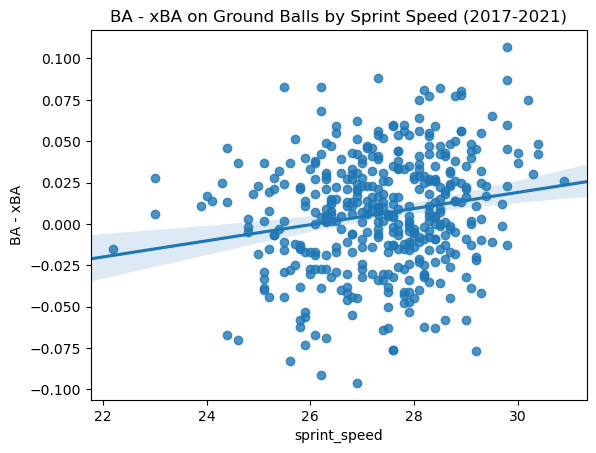

In [24]:
#Create a graph with both X variables to see if either appears to have a relationship
sns.regplot(data = data17_21_clean, x = "sprint_speed", y = "BA - xBA", x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000,order=1, logistic=False, lowess=False, truncate=False, dropna=True, marker='o', scatter_kws=None, line_kws=None, ax=None).set(title = "BA - xBA on Ground Balls by Sprint Speed (2017-2021)")

[Text(0.5, 1.0, 'BA - xBA on Ground Balls by Home to First (2017-2021)')]

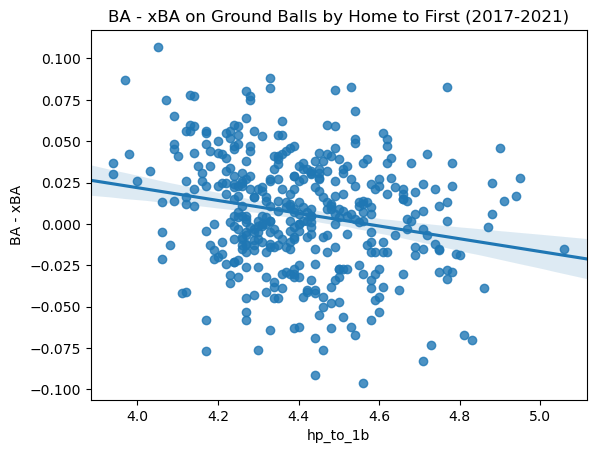

In [25]:
sns.regplot(data = data17_21_clean, x = "hp_to_1b", y = "BA - xBA", x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000,order=1, logistic=False, lowess=False, truncate=False, dropna=True, marker='o', scatter_kws=None, line_kws=None, ax=None).set(title = "BA - xBA on Ground Balls by Home to First (2017-2021)")

In [26]:
#There appears to be a slight correlation, but not much for batting average. Still will create model to see if this is true.
bapredict = data17_21_clean[["hp_to_1b","sprint_speed","BA - xBA"]]
X_train_ba = bapredict.drop('BA - xBA', axis=1)
y_train_ba = bapredict['BA - xBA']
X_test_ba = data22_clean[["hp_to_1b","sprint_speed"]]
y_test_ba = data22_clean[["BA - xBA"]]

# creating train and test sets
linear_model_ba = lm.LinearRegression()
  
# fitting the model
linear_model_ba.fit(X_train_ba, y_train_ba)



predictions_ba = linear_model_ba.predict(X_test_ba)

print('mean_squared_error : ', mean_squared_error(y_test_ba, predictions_ba))
print('mean_absolute_error : ', mean_absolute_error(y_test_ba, predictions_ba))
#Mean absolute error seems better, as squaring a small number makes it very small. Must test this against standard error of batting average to see if significant
data22_clean["BA - xBA"].std()
#Our mean absolute error is close to standard deviation, so appears to not be significant. Will test with R^2

score_ba = 100 * r2_score(y_test_ba, predictions_ba)
print(round (score_ba,2), "% of the percentage of variance in BA minus expected on ground balls is explained by sprint speed ") 
skscore_ba = linear_model_ba.score(bapredict[["hp_to_1b","sprint_speed"]], bapredict["BA - xBA"])
print("Scikit's score of this model is ", skscore_ba)
#The score of the model appears to be very low for this, indicating that speed to first base has little effect on Batting Average above expected on ground balls

mean_squared_error :  0.0017124227887466575
mean_absolute_error :  0.03295486536432263
3.09 % of the percentage of variance in BA minus expected on ground balls is explained by sprint speed 
Scikit's score of this model is  0.04622393070942288


[Text(0.5, 1.0, 'Slugging above normal by Sprint Speed (2017-2021)')]

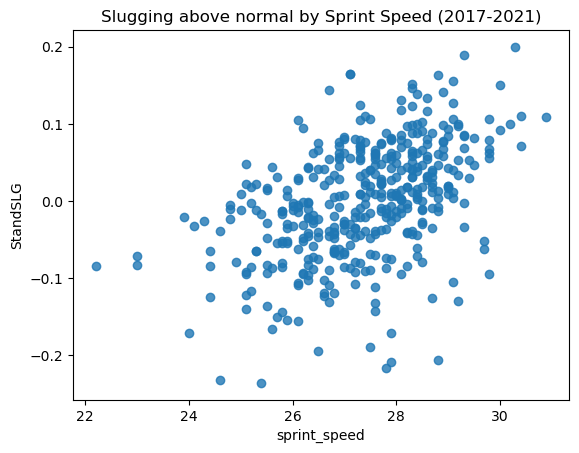

In [27]:
#Repeat the process for the speed variables on slugging
sns.regplot(data = data17_21_clean, x = "sprint_speed", y = "StandSLG", x_ci='ci', scatter=True, fit_reg=False, ci=95, n_boot=1000,order=1, logistic=False, lowess=False, truncate=False, dropna=True, marker='o', scatter_kws=None, line_kws=None, ax=None).set(title = "Slugging above normal by Sprint Speed (2017-2021)")

[Text(0.5, 1.0, 'Slugging above normal by Home to First (2017-2021)')]

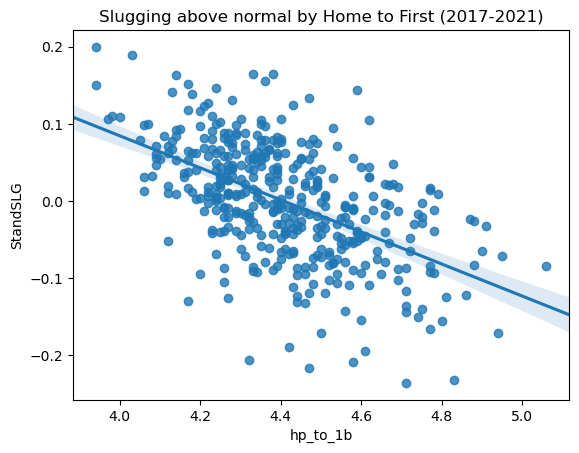

In [28]:
sns.regplot(data = data17_21_clean, x = "hp_to_1b", y = "StandSLG", x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000,order=1, logistic=False, lowess=False, truncate=False, dropna=True, marker='o', scatter_kws=None, line_kws=None, ax=None).set(title = "Slugging above normal by Home to First (2017-2021)")

In [29]:
#There appears to be more a correlation here, but must test to see. Still will create model to see if this is true.
slgpredict = data17_21_clean[["hp_to_1b","sprint_speed","StandSLG"]]
X_train_slg = slgpredict.drop('StandSLG', axis=1)
y_train_slg = slgpredict['StandSLG']
X_test_slg = data22_clean[["hp_to_1b","sprint_speed"]]
y_test_slg = data22_clean[["StandSLG"]]

# creating train and test sets
linear_model_slg = lm.LinearRegression()
  
# fitting the model
linear_model_slg.fit(X_train_slg, y_train_slg)

predictions_slg = linear_model_slg.predict(X_test_slg)

print('mean_squared_error : ', mean_squared_error(y_test_slg, predictions_slg))
print('mean_absolute_error : ', mean_absolute_error(y_test_slg, predictions_slg))

#Mean absolute error seems better, as squaring a small number makes it very small. Must test this against standard error of batting average to see if significant
data22_clean["StandSLG"].std()
#Our mean absolute error is close to standard deviation, so appears to not be significant. Will test with R^2

score_slg = 100 * r2_score(y_test_slg, predictions_slg)
print(round (score_slg,2), "% of the percentage of variance in Slugging above normal on hits in play is explained by speed. ") 
skscore_slg = linear_model_slg.score(slgpredict[["hp_to_1b","sprint_speed"]], slgpredict["StandSLG"])
print("Scikit's score of this model is ", skscore_slg)

mean_squared_error :  0.0052403952633461575
mean_absolute_error :  0.05732238778377678
14.76 % of the percentage of variance in Slugging above normal on hits in play is explained by speed. 
Scikit's score of this model is  0.2894133992813708


In [30]:
SLGCoeffs = pd.DataFrame(zip(X_test_slg.columns, linear_model_slg.coef_))
SLGCoeffs

,0,1
0,hp_to_1b,-0.225341
1,sprint_speed,-0.002880


In [31]:
BACoeffs = pd.DataFrame(zip(X_test_ba.columns, linear_model_ba.coef_))

In [32]:
BACoeffs

,0,1
0,hp_to_1b,-0.038759
1,sprint_speed,-0.000033


In [33]:
#From both these models, it appears that sprint speed has almost no impact on our model, and may be what we don't want. Probably because of high correlation with hp to first Create a new model, eliminating sprint speed as a feature

In [34]:
#There appears to be a slight correlation, but not much for batting average. Still will create model to see if this is true.
bapredict = data17_21_clean[["hp_to_1b","BA - xBA"]]
X_train_ba = bapredict.drop('BA - xBA', axis=1)
y_train_ba = bapredict['BA - xBA']
X_test_ba = data22_clean[["hp_to_1b"]]
y_test_ba = data22_clean[["BA - xBA"]]

# creating train and test sets
linear_model_ba = lm.LinearRegression()
  
# fitting the model
linear_model_ba.fit(X_train_ba, y_train_ba)



predictions_ba = linear_model_ba.predict(X_test_ba)

print('mean_squared_error : ', mean_squared_error(y_test_ba, predictions_ba))
print('mean_absolute_error : ', mean_absolute_error(y_test_ba, predictions_ba))
#Mean absolute error seems better, as squaring a small number makes it very small. Must test this against standard error of batting average to see if significant
print("SD of data is ",data22_clean["BA - xBA"].std())
#Our mean absolute error is close to standard deviation, so appears to not be significant. Will test with R^2

score_ba = 100 * r2_score(y_test_ba, predictions_ba)
print(round (score_ba,2), "% of the percentage of variance in BA minus expected on ground balls is explained by home to first") 
skscore_ba = linear_model_ba.score(bapredict[["hp_to_1b"]], bapredict["BA - xBA"])
print("Scikit's score of this model is ", skscore_ba)
#The score of the model appears to be very low for this, indicating that speed to first base has little effect on Batting Average above expected on ground balls

mean_squared_error :  0.0017124346052078594
mean_absolute_error :  0.032955517315857254
SD of data is  0.04211735552562194
3.09 % of the percentage of variance in BA minus expected on ground balls is explained by home to first
Scikit's score of this model is  0.04622357811766031


In [35]:
slgpredict = data17_21_clean[["hp_to_1b","StandSLG"]]
X_train_slg = slgpredict.drop('StandSLG', axis=1)
y_train_slg = slgpredict['StandSLG']
X_test_slg = data22_clean[["hp_to_1b"]]
y_test_slg = data22_clean[["StandSLG"]]

# creating train and test sets
linear_model_slg = lm.LinearRegression()
  
# fitting the model
linear_model_slg.fit(X_train_slg, y_train_slg)

predictions_slg = linear_model_slg.predict(X_test_slg)

print('mean_squared_error : ', mean_squared_error(y_test_slg, predictions_slg))
print('mean_absolute_error : ', mean_absolute_error(y_test_slg, predictions_slg))

#Mean absolute error seems better, as squaring a small number makes it very small. Must test this against standard error of batting average to see if significant
print("SD of data is ",data22_clean["StandSLG"].std())
#Our mean absolute error is close to standard deviation, so appears to not be significant. Will test with R^2

score_slg = 100 * r2_score(y_test_slg, predictions_slg)
print(round (score_slg,2), "% of the percentage of variance in Slugging above normal on hits in play is explained by home to first. ") 
skscore_slg = linear_model_slg.score(slgpredict[["hp_to_1b"]], slgpredict["StandSLG"])
print("Scikit's score of this model is ", skscore_slg)

mean_squared_error :  0.0052380402045285905
mean_absolute_error :  0.057300312702183755
SD of data is  0.07856118744176528
14.8 % of the percentage of variance in Slugging above normal on hits in play is explained by home to first. 
Scikit's score of this model is  0.28882158453677165


In [36]:
#Neither seems to be a consistent predictor, but there are some players who benefit from their speed more than others

In [37]:
#create a table that shows which players have the highest addition to their profile from these hustle plays for the data from 2017-2021
data17_21_clean.head()


,Total_Pitches,Player,hp_to_1b,sprint_speed,Non-HR_Hits,SLG,xSLG,SLG - xSLG,Ground_Balls,xBA,BA - xBA,StandSLG
0,3049,"Merrifield, Whit",4.26,28.8,755.0,1.283,0.778,0.505,917.0,0.254,0.026,-0.008357
1,2918,"Santana, Carlos",4.55,25.7,491.0,1.263,0.804,0.459,898.0,0.232,-0.025,-0.054357
2,2916,"Machado, Manny",4.59,26.3,580.0,1.259,0.787,0.472,889.0,0.251,0.021,-0.041357
3,2916,"Goldschmidt, Paul",4.51,26.6,588.0,1.281,0.887,0.394,747.0,0.264,0.031,-0.119357
4,2884,"Lindor, Francisco",4.27,28.0,565.0,1.313,0.792,0.521,912.0,0.251,-0.005,0.007643


In [38]:
data17_21_clean["PCTGroundBalls"] = data17_21_clean.Ground_Balls/data17_21_clean.Total_Pitches
data17_21_clean.head()

C:\Users\eamon\AppData\Local\Temp\ipykernel_27528\4024257225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data17_21_clean["PCTGroundBalls"] = data17_21_clean.Ground_Balls/data17_21_clean.Total_Pitches


,Total_Pitches,Player,hp_to_1b,sprint_speed,Non-HR_Hits,SLG,xSLG,SLG - xSLG,Ground_Balls,xBA,BA - xBA,StandSLG,PCTGroundBalls
0,3049,"Merrifield, Whit",4.26,28.8,755.0,1.283,0.778,0.505,917.0,0.254,0.026,-0.008357,0.300754
1,2918,"Santana, Carlos",4.55,25.7,491.0,1.263,0.804,0.459,898.0,0.232,-0.025,-0.054357,0.307745
2,2916,"Machado, Manny",4.59,26.3,580.0,1.259,0.787,0.472,889.0,0.251,0.021,-0.041357,0.304870
3,2916,"Goldschmidt, Paul",4.51,26.6,588.0,1.281,0.887,0.394,747.0,0.264,0.031,-0.119357,0.256173
4,2884,"Lindor, Francisco",4.27,28.0,565.0,1.313,0.792,0.521,912.0,0.251,-0.005,0.007643,0.316227


In [39]:
data17_21_clean["PCTHitsinPlay"] = data17_21_clean["Non-HR_Hits"]/data17_21_clean.Total_Pitches
data17_21_clean.head()


C:\Users\eamon\AppData\Local\Temp\ipykernel_27528\1873294592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data17_21_clean["PCTHitsinPlay"] = data17_21_clean["Non-HR_Hits"]/data17_21_clean.Total_Pitches


,Total_Pitches,Player,hp_to_1b,sprint_speed,Non-HR_Hits,SLG,xSLG,SLG - xSLG,Ground_Balls,xBA,BA - xBA,StandSLG,PCTGroundBalls,PCTHitsinPlay
0,3049,"Merrifield, Whit",4.26,28.8,755.0,1.283,0.778,0.505,917.0,0.254,0.026,-0.008357,0.300754,0.247622
1,2918,"Santana, Carlos",4.55,25.7,491.0,1.263,0.804,0.459,898.0,0.232,-0.025,-0.054357,0.307745,0.168266
2,2916,"Machado, Manny",4.59,26.3,580.0,1.259,0.787,0.472,889.0,0.251,0.021,-0.041357,0.304870,0.198903
3,2916,"Goldschmidt, Paul",4.51,26.6,588.0,1.281,0.887,0.394,747.0,0.264,0.031,-0.119357,0.256173,0.201646
4,2884,"Lindor, Francisco",4.27,28.0,565.0,1.313,0.792,0.521,912.0,0.251,-0.005,0.007643,0.316227,0.195908


In [40]:
#Create a stat for Standard Slugging*PCTHitsinPlay to find the contribution to slugging of these results
data17_21_clean.loc[:,"AddedSLG"] = data17_21_clean.loc[:,"StandSLG"].mul(data17_21_clean.loc[:,"PCTHitsinPlay"])
data17_21_clean.nlargest(5,"AddedSLG")
data17_21_clean.nsmallest(5,"AddedSLG")

C:\Users\eamon\AppData\Local\Temp\ipykernel_27528\1707889812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data17_21_clean.loc[:,"AddedSLG"] = data17_21_clean.loc[:,"StandSLG"].mul(data17_21_clean.loc[:,"PCTHitsinPlay"])


,Total_Pitches,Player,hp_to_1b,sprint_speed,Non-HR_Hits,SLG,xSLG,SLG - xSLG,Ground_Balls,xBA,BA - xBA,StandSLG,PCTGroundBalls,PCTHitsinPlay,AddedSLG
501,464,"Lewis, Kyle",4.47,27.8,83.0,1.145,0.848,0.297,112.0,0.253,0.060,-0.216357,0.241379,0.178879,-0.038702
588,320,"McCormick, Chas",4.32,28.8,59.0,1.203,0.896,0.307,66.0,0.289,0.014,-0.206357,0.206250,0.184375,-0.038047
115,1977,"Cabrera, Miguel",4.94,24.0,412.0,1.180,0.838,0.342,627.0,0.232,0.017,-0.171357,0.317147,0.208397,-0.035710
59,2350,"Judge, Aaron",4.58,27.9,402.0,1.246,0.941,0.305,522.0,0.302,-0.034,-0.208357,0.222128,0.171064,-0.035642
565,349,"Collins, Zack",4.71,25.4,51.0,1.373,1.095,0.278,61.0,0.253,-0.003,-0.235357,0.174785,0.146132,-0.034393


0.46255103250612645

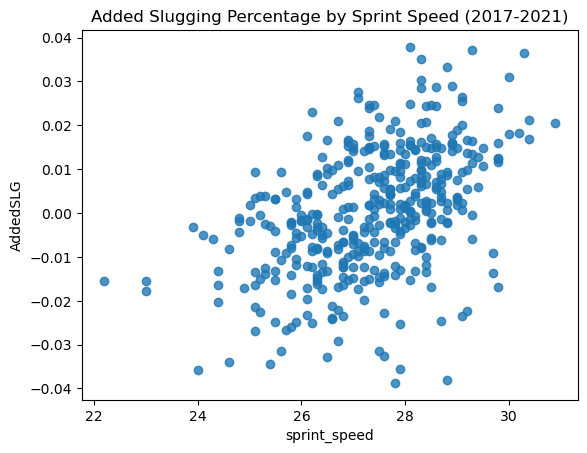

In [41]:
#to see if there exists a relationship between AddedSLG and sprint speed/home to first, create a graph to visualize this and run correlation
sns.regplot(data = data17_21_clean, x = "sprint_speed", y = "AddedSLG", x_ci='ci', scatter=True, fit_reg=False, ci=95, n_boot=1000,order=1, logistic=False, lowess=False, truncate=False, dropna=True, marker='o', scatter_kws=None, line_kws=None, ax=None).set(title = "Added Slugging Percentage by Sprint Speed (2017-2021)")
data17_21_clean["sprint_speed"]. corr(data17_21_clean["AddedSLG"])

-0.5376942216460356

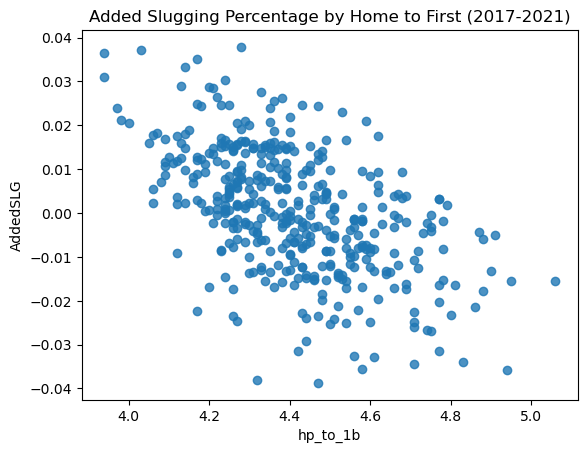

In [42]:
#Run similar plot for first base
sns.regplot(data = data17_21_clean, x = "hp_to_1b", y = "AddedSLG", x_ci='ci', scatter=True, fit_reg=False, ci=95, n_boot=1000,order=1, logistic=False, lowess=False, truncate=False, dropna=True, marker='o', scatter_kws=None, line_kws=None, ax=None).set(title = "Added Slugging Percentage by Home to First (2017-2021)")
data17_21_clean["hp_to_1b"]. corr(data17_21_clean["AddedSLG"])
#It appears that there is somewhat of a relationship between added slugging and these other variables, suggesting that
#faster players are put in the situation more, and are able to use this ability to "take the extra base" more.

In [43]:
#Repeat the process using the data for ground balls
data17_21_clean.loc[:,"AddedBAonGB"] = data17_21_clean.loc[:,"BA - xBA"].mul(data17_21_clean.loc[:,"PCTGroundBalls"])
data17_21_clean.nlargest(5,"AddedBAonGB")



C:\Users\eamon\AppData\Local\Temp\ipykernel_27528\230978462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data17_21_clean.loc[:,"AddedBAonGB"] = data17_21_clean.loc[:,"BA - xBA"].mul(data17_21_clean.loc[:,"PCTGroundBalls"])


,Total_Pitches,Player,hp_to_1b,sprint_speed,Non-HR_Hits,SLG,xSLG,SLG - xSLG,Ground_Balls,xBA,BA - xBA,StandSLG,PCTGroundBalls,PCTHitsinPlay,AddedSLG,AddedBAonGB
582,324,"Madrigal, Nick",4.28,28.1,94.0,1.223,0.579,0.644,163.0,0.213,0.075,0.130643,0.503086,0.290123,0.037903,0.037731
207,1419,"DeShields, Delino",4.05,29.8,288.0,1.243,0.651,0.592,479.0,0.238,0.107,0.078643,0.337562,0.202960,0.015961,0.036119
469,535,"Sierra, Magneuris",3.97,29.8,120.0,1.158,0.538,0.620,221.0,0.243,0.087,0.106643,0.413084,0.224299,0.023920,0.035938
424,668,"Jankowski, Travis",4.14,28.8,137.0,1.219,0.543,0.676,267.0,0.230,0.077,0.162643,0.399701,0.205090,0.033356,0.030777
462,559,"Munoz, Yairo",4.28,28.3,132.0,1.227,0.672,0.555,220.0,0.218,0.077,0.041643,0.393560,0.236136,0.009833,0.030304


0.1845466914853846

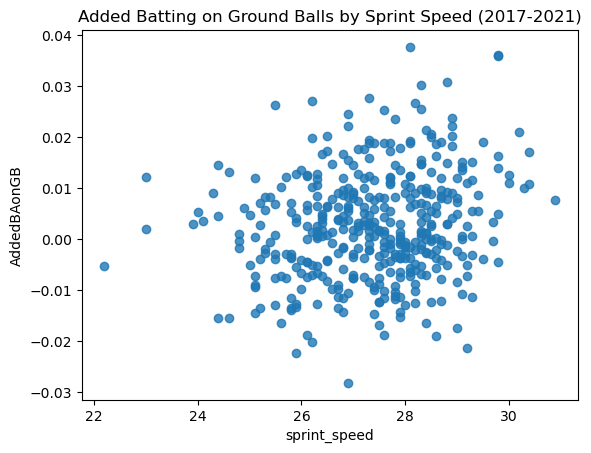

In [44]:
#Create graphs
sns.regplot(data = data17_21_clean, x = "sprint_speed", y = "AddedBAonGB", x_ci='ci', scatter=True, fit_reg=False, ci=95, n_boot=1000,order=1, logistic=False, lowess=False, truncate=False, dropna=True, marker='o', scatter_kws=None, line_kws=None, ax=None).set(title = "Added Batting on Ground Balls by Sprint Speed (2017-2021)")
data17_21_clean["sprint_speed"]. corr(data17_21_clean["AddedBAonGB"])

-0.22163368410404827

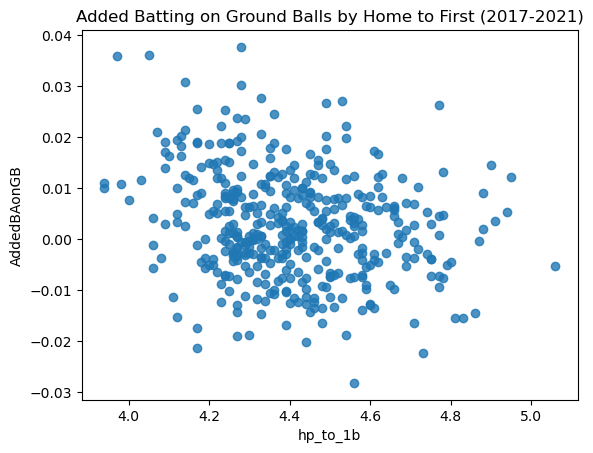

In [45]:
sns.regplot(data = data17_21_clean, x = "hp_to_1b", y = "AddedBAonGB", x_ci='ci', scatter=True, fit_reg=False, ci=95, n_boot=1000,order=1, logistic=False, lowess=False, truncate=False, dropna=True, marker='o', scatter_kws=None, line_kws=None, ax=None).set(title = "Added Batting on Ground Balls by Home to First (2017-2021)")
data17_21_clean["hp_to_1b"]. corr(data17_21_clean["AddedBAonGB"])

In [46]:
#Although there is a relationship between added slugging and speed, it appears that faster players do not
#necessarily get any advantage from more ground balls, so it appears that this relationship on hustle plays does 
#not exist for ground balls. Nevertheless, is important to look at these hustle plays. Since on base percentage
#is already determined on hits, and slugging on ground ball hits is relatively close to 1, can add them directly.
#take a look at correlation
data17_21_clean["AddedSLG"]. corr(data17_21_clean["AddedBAonGB"])

0.41128265585038815

In [47]:
data17_21_clean.loc[:,"AddedHustleOPS"] = data17_21_clean.loc[:,"AddedSLG"].add(data17_21_clean.loc[:,"AddedBAonGB"])

C:\Users\eamon\AppData\Local\Temp\ipykernel_27528\116792895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data17_21_clean.loc[:,"AddedHustleOPS"] = data17_21_clean.loc[:,"AddedSLG"].add(data17_21_clean.loc[:,"AddedBAonGB"])


In [48]:
data17_21_clean.head()

,Total_Pitches,Player,hp_to_1b,sprint_speed,Non-HR_Hits,SLG,xSLG,SLG - xSLG,Ground_Balls,xBA,BA - xBA,StandSLG,PCTGroundBalls,PCTHitsinPlay,AddedSLG,AddedBAonGB,AddedHustleOPS
0,3049,"Merrifield, Whit",4.26,28.8,755.0,1.283,0.778,0.505,917.0,0.254,0.026,-0.008357,0.300754,0.247622,-0.002069,0.007820,0.005750
1,2918,"Santana, Carlos",4.55,25.7,491.0,1.263,0.804,0.459,898.0,0.232,-0.025,-0.054357,0.307745,0.168266,-0.009146,-0.007694,-0.016840
2,2916,"Machado, Manny",4.59,26.3,580.0,1.259,0.787,0.472,889.0,0.251,0.021,-0.041357,0.304870,0.198903,-0.008226,0.006402,-0.001824
3,2916,"Goldschmidt, Paul",4.51,26.6,588.0,1.281,0.887,0.394,747.0,0.264,0.031,-0.119357,0.256173,0.201646,-0.024068,0.007941,-0.016126
4,2884,"Lindor, Francisco",4.27,28.0,565.0,1.313,0.792,0.521,912.0,0.251,-0.005,0.007643,0.316227,0.195908,0.001497,-0.001581,-0.000084


In [49]:
data17_21_clean.nlargest(5,"AddedHustleOPS")

,Total_Pitches,Player,hp_to_1b,sprint_speed,Non-HR_Hits,SLG,xSLG,SLG - xSLG,Ground_Balls,xBA,BA - xBA,StandSLG,PCTGroundBalls,PCTHitsinPlay,AddedSLG,AddedBAonGB,AddedHustleOPS
582,324,"Madrigal, Nick",4.28,28.1,94.0,1.223,0.579,0.644,163.0,0.213,0.075,0.130643,0.503086,0.290123,0.037903,0.037731,0.075634
424,668,"Jankowski, Travis",4.14,28.8,137.0,1.219,0.543,0.676,267.0,0.230,0.077,0.162643,0.399701,0.205090,0.033356,0.030777,0.064133
268,1159,"Lopez, Nicky",4.17,28.3,269.0,1.249,0.584,0.665,539.0,0.214,0.055,0.151643,0.465056,0.232097,0.035196,0.025578,0.060774
469,535,"Sierra, Magneuris",3.97,29.8,120.0,1.158,0.538,0.620,221.0,0.243,0.087,0.106643,0.413084,0.224299,0.023920,0.035938,0.059858
207,1419,"DeShields, Delino",4.05,29.8,288.0,1.243,0.651,0.592,479.0,0.238,0.107,0.078643,0.337562,0.202960,0.015961,0.036119,0.052081


In [50]:
data17_21_clean.nsmallest(5,"AddedHustleOPS")

,Total_Pitches,Player,hp_to_1b,sprint_speed,Non-HR_Hits,SLG,xSLG,SLG - xSLG,Ground_Balls,xBA,BA - xBA,StandSLG,PCTGroundBalls,PCTHitsinPlay,AddedSLG,AddedBAonGB,AddedHustleOPS
323,972,"Avila, Alex",4.83,24.6,142.0,1.296,1.015,0.281,214.0,0.249,-0.070,-0.232357,0.220165,0.146091,-0.033945,-0.015412,-0.049357
541,390,"Refsnyder, Rob",4.42,27.5,65.0,1.231,0.907,0.324,117.0,0.246,-0.041,-0.189357,0.300000,0.166667,-0.031559,-0.012300,-0.043859
507,451,"Cordero, Franchy",4.17,29.2,78.0,1.333,0.949,0.384,125.0,0.266,-0.077,-0.129357,0.277162,0.172949,-0.022372,-0.021341,-0.043714
59,2350,"Judge, Aaron",4.58,27.9,402.0,1.246,0.941,0.305,522.0,0.302,-0.034,-0.208357,0.222128,0.171064,-0.035642,-0.007552,-0.043195
10,2811,"Freeman, Freddie",4.44,26.7,622.0,1.294,0.912,0.382,760.0,0.264,-0.042,-0.131357,0.270366,0.221274,-0.029066,-0.011355,-0.040421


In [51]:
data17_21_clean["AddedHustleOPS"].mean()

0.003239846919341511